In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class environment:
    def __init__(self, k):
        self.k = k
        self.mean = np.random.randint(-10, 20, k)
        self.cov = np.eye(k)
    
    def pull(self, a):
        return np.random.multivariate_normal(self.mean, self.cov)[a]
    
    def best_arm(self):
        return np.argmax(self.mean)

In [3]:
class epsilon_greedy_agent:
    def __init__(self, epsilon, environment):
        self.epsilon = epsilon
        self.environment = environment
        self.k = environment.k
        self.N = np.zeros(self.k)
        self.Q = np.zeros(self.k)
        
    def get_reward(self, action):
        return self.environment.pull(action)
    
    def explore_and_exploit(self, steps=1000):
        avg_rewards = np.zeros(steps)
        total_reward = 0
        for i in range(1, steps+1):
            rand = np.random.rand()
            if rand > self.epsilon:
                max_actions = np.argwhere(self.Q == np.amax(self.Q))
                action = max_actions[np.random.randint(0, len(max_actions))][0]
            else:
                action = np.random.randint(0, self.k)
            reward = self.get_reward(action)
            self.N[action] += 1
            self.Q[action] += (1 / self.N[action]) * (reward - self.Q[action])
            total_reward += reward
            avg_rewards[i-1] = total_reward / i
        return avg_rewards

In [4]:
class UCB:
    def __init__(self, c, environment):
        self.c = c
        self.environment = environment
        self.k = environment.k
        self.N = np.zeros(self.k)
        self.Q = np.zeros(self.k)
        
    def get_reward(self, action):
        return self.environment.pull(action)
    
    def explore_and_exploit(self, steps=1000):
        avg_rewards = np.zeros(steps)
        total_reward = 0
        for i in range(1, steps+1):
            ucb_estimates = self.Q + self.c * np.sqrt(np.log(i) / (self.N + 1e-16))
            max_actions = np.argwhere(ucb_estimates == np.amax(ucb_estimates))
            action = max_actions[np.random.randint(0, len(max_actions))][0]
            reward = self.get_reward(action)
            self.N[action] += 1
            self.Q[action] += (1 / self.N[action]) * (reward - self.Q[action])
            total_reward += reward
            avg_rewards[i-1] = total_reward / i
        return avg_rewards

In [5]:
env = environment(10)
env.mean = np.array([2, 1, -1.2, 5, 10, -0.2, 4, 6.8, -5, 0])

In [14]:
epochs=2000
steps=1000
avg1 = np.zeros(steps)
avg2 = np.zeros(steps)
avg3 = np.zeros(steps)
for i in range(epochs):
    avg1 += epsilon_greedy_agent(0.1, env).explore_and_exploit(steps)
    avg2 += epsilon_greedy_agent(0.01, env).explore_and_exploit(steps)
    avg3 += UCB(2, env).explore_and_exploit(steps)
avg1 /= epochs
avg2 /= epochs
avg3 /= epochs

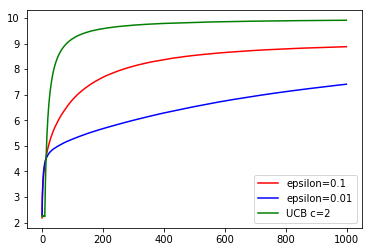

In [23]:
plt.plot(avg1, "r")
plt.plot(avg2, "b")
plt.plot(avg3, "g")
plt.legend(["epsilon=0.1", "epsilon=0.01", "UCB c=2"])